# LinearResponse.jl
## compute linear response theory for the radially-biased Plummer model

This notebook is a first example of performing linear response theory to find an unstable mode in a radially-biased Plummer model.

In [1]:

import OrbitalElements
import AstroBasis
import FiniteHilbertTransform
import LinearResponse
using HDF5

using Plots


 Select the basis:

In [2]:
# Basis
G  = 1.
rb = 3.0
lmax,nradial = 2,5 # Usually lmax corresponds to the considered harmonics lharmonic
basis = AstroBasis.CB73Basis(lmax=lmax, nradial=nradial,G=G,rb=rb)


AstroBasis.CB73Basis("CB73", 3, 2, 5, 1.0, 3.0, [-2.666666666666667 -1.1925695879998877 … -0.5819143739626462 -0.46420708254852755; -2.754121490636385 -1.1041048949477668 … -0.37902349574330746 -0.26114836434193534; -3.950165759029553 -1.3879467704156914 … -0.3693195586439153 -0.2277378187450128], [0.07073553026306459 0.158169454092706 … 0.32415092175333304 0.4063446849322611; 0.36527670759199987 0.3416850727945179 … 0.33177904592534535 0.3301953660194258; 1.2224496794648094 0.7731450624103126 … 0.4669667648574201 0.3926606621408779], [0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 0.0, 0.0, 0.0, 0.0])

Select the model potential

In [3]:
# Model Potential
const modelname = "PlummerE"
const bc, M = 1.,1. # G is defined above: must agree with basis!
ψ(r::Float64)::Float64   = OrbitalElements.ψPlummer(r,bc,M,G)
dψ(r::Float64)::Float64  = OrbitalElements.dψPlummer(r,bc,M,G)
d2ψ(r::Float64)::Float64 = OrbitalElements.d2ψPlummer(r,bc,M,G)
Ω₀ = OrbitalElements.Ω₀Plummer(bc,M,G)



2.0

Select the distribution function

In [4]:
# Model Distribution Function
dfname = "roi0.75"

function ndFdJ(n1::Int64,n2::Int64,
               E::Float64,L::Float64,
               ndotOmega::Float64;
               bc::Float64=1.,M::Float64=1.,astronomicalG::Float64=1.,Ra::Float64=0.75)

    return OrbitalElements.plummer_ROI_ndFdJ(n1,n2,E,L,ndotOmega,bc,M,astronomicalG,Ra)

end


ndFdJ (generic function with 1 method)

Set the Legendre integration parameters

In [5]:

# Linear Response integration parameters
Ku = 12    # number of Legendre integration sample points
Kv = 20    # number of allocations is directly proportional to this
Kw = 20    # number of allocations is insensitive to this (also time, largely)?

# Define the helper for the Finite Hilbert Transform
FHT = FiniteHilbertTransform.LegendreFHT(Ku)


FiniteHilbertTransform.LegendreFHT("Legendre", 12, [-0.9815606342467192, -0.9041172563704748, -0.7699026741943047, -0.5873179542866175, -0.3678314989981802, -0.1252334085114689, 0.1252334085114689, 0.3678314989981802, 0.5873179542866175, 0.7699026741943047, 0.9041172563704748, 0.9815606342467192], [0.04717533638651175, 0.10693932599531826, 0.16007832854334625, 0.20316742672306587, 0.23349253653835492, 0.24914704581340288, 0.24914704581340288, 0.23349253653835492, 0.20316742672306587, 0.16007832854334625, 0.10693932599531826, 0.04717533638651175], [1.0 1.0 … 1.0 1.0; -0.9815606342467192 -0.9041172563704748 … 0.9041172563704748 0.9815606342467192; … ; 0.2128654635241482 -0.29109986939751276 … -0.29109986939751276 0.2128654635241482; -0.10371771048417233 0.15398630618695686 … -0.15398630618695686 0.10371771048417233], [0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5], ComplexF64[0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0.0im, 0.0 + 0

Set the number of resonances

In [6]:
lharmonic = lmax
n1max = 1  # the Fiducial value is 10, but in the interest of a quick calculation, we limit ourselves to 1.


1

Set the evaluation grid for linear response

In [7]:
# Mode of response matrix computation
# Frequencies to probe
nOmega   = 280
Omegamin = -0.2
Omegamax = 0.2
nEta     = 280
Etamin   = -0.1
Etamax   = 0.1





0.1

 Set the remaining parameters into the structures

In [8]:

# output directories
wmatdir  = "./"
gfuncdir = "./"
modedir  = "./"


VERBOSE   = 2
OVERWRITE = false
VMAPN     = 1
ADAPTIVEKW= false

OEparams = OrbitalElements.OrbitalParameters(Ω₀=Ω₀,
                                             EDGE=OrbitalElements.DEFAULT_EDGE,TOLECC=OrbitalElements.DEFAULT_TOLECC,TOLA=OrbitalElements.DEFAULT_TOLA,
                                             NINT=OrbitalElements.DEFAULT_NINT,
                                             da=OrbitalElements.DEFAULT_DA,de=OrbitalElements.DEFAULT_DE,
                                             ITERMAX=OrbitalElements.DEFAULT_ITERMAX,invε=OrbitalElements.DEFAULT_TOL)


Parameters = LinearResponse.LinearParameters(basis,Orbitalparams=OEparams,Ku=Ku,Kv=Kv,Kw=Kw,
                                             modelname=modelname,dfname=dfname,
                                             wmatdir=wmatdir,gfuncdir=gfuncdir,modedir=modedir,axidir=modedir,
                                             lharmonic=lharmonic,n1max=n1max,
                                             VERBOSE=VERBOSE,OVERWRITE=OVERWRITE,
                                             VMAPN=VMAPN,ADAPTIVEKW=ADAPTIVEKW)




LinearResponse.LinearParameters(OrbitalElements.OrbitalParameters(2.0, 0.0, Inf, 1.0, 0.01, 0.01, 0.1, 32, 0.0001, 0.0001, 100, 1.0e-12), 3, 5, Dict{String, Union{Number, String}}("name" => "CB73", "lmax" => 2, "nradial" => 5, "dimension" => 3, "G" => 1.0, "rb" => 3.0), 12, 20, 20, 1, false, 10000, "PlummerE", "roi0.75", "./", "./", "./", "./", false, 2, 1, 8, [-1 1 … 1 -1; 2 -2 … 0 0], 2)


### Run Linear Response!
1. Call the function to construct W matrices
2. Run the G function calculation
3. Compute the matrix coefficients

In [9]:


@time LinearResponse.RunLinearResponse(ψ,dψ,d2ψ,ndFdJ,FHT,basis,Parameters)



LinearResponse.WMat.RunWmat: Number of resonances to compute: 8
LinearResponse.WMat.RunWmat: Computing W for the (-1,2) resonance.
  0.050403 seconds (1.22 k allocations: 46.938 KiB, 3.83% compilation time)
LinearResponse.WMat.RunWmat: Computing W for the (1,-2) resonance.
  0.047809 seconds (1.21 k allocations: 46.062 KiB)
LinearResponse.WMat.RunWmat: Computing W for the (0,2) resonance.
  0.052976 seconds (1.22 k allocations: 46.266 KiB)
LinearResponse.WMat.RunWmat: Computing W for the (0,-2) resonance.
  0.052311 seconds (1.22 k allocations: 46.266 KiB)
LinearResponse.WMat.RunWmat: Computing W for the (1,2) resonance.
  0.056156 seconds (1.21 k allocations: 46.078 KiB)
LinearResponse.WMat.RunWmat: Computing W for the (-1,-2) resonance.
  0.056476 seconds (1.21 k allocations: 46.078 KiB)
LinearResponse.WMat.RunWmat: Computing W for the (1,0) resonance.
  0.050187 seconds (1.21 k allocations: 46.078 KiB)
LinearResponse.WMat.RunWmat: Computing W for the (-1,0) resonance.
  0.051303 sec

In [10]:

# construct a grid of frequencies to probe
tabω = LinearResponse.gridomega(Omegamin,Omegamax,nOmega,Etamin,Etamax,nEta)
@time tabRMreal, tabRMimag = LinearResponse.RunMatrices(tabω,FHT,Parameters)
@time tabdet = LinearResponse.RunDeterminant(tabω,FHT,Parameters)




LinearResponse.Xi.RunM: tabaMcoef loaded.
LinearResponse.Xi.RunMatrices: computing 78400 frequency values.
  0.000005 seconds
  0.924551 seconds (862.79 k allocations: 89.379 MiB, 2.39% gc time, 60.43% compilation time)
LinearResponse.Xi.RunM: tabaMcoef loaded.
LinearResponse.Determinant.RunDeterminant: computing 78400 frequency values.
  0.000005 seconds
  0.994835 seconds (1.87 M allocations: 591.722 MiB, 9.30% gc time, 48.55% compilation time)


78400-element Vector{ComplexF64}:
  387750.8681736065 - 125234.7368578976im
  297256.4487327276 - 108443.47950655379im
 226748.83861029582 - 91268.48495208478im
  172185.0045861429 - 74824.79218047808im
  130250.3785701936 - 59778.07783994167im
  98247.61916942686 - 46474.49694880709im
   73997.7639465608 - 35039.2926734825im
  55753.57711699745 - 25450.693377078325im
 42124.489615382714 - 17594.429721217697im
 32012.275217807877 - 11303.201630729369im
 24556.467752842622 - 6384.583122041067im
   19088.4688642392 - 2640.1519691775534im
 15093.298732060486 + 121.94810727259556im
                    ⋮
 0.8017871676797943 - 0.40865141983322906im
 0.8003666860802657 - 0.4064533776750643im
 0.7989675502430794 - 0.404272252570939im
 0.7975894484500111 - 0.402107854693882im
 0.7962320743674365 - 0.39995999749511957im
 0.7948951269353578 - 0.39782849762429773im
 0.7935783102590412 - 0.3957131748521057im
 0.7922813335032038 - 0.3936138519952173im
 0.7910039107886814 - 0.3915303548434688im
 0.78

In [11]:

# find a pole by using gradient descent
# the search is somewhat sensitive to the initial parameter, if the mode is not dominant over false poles.
startingomg = 0.0 + 0.05im
@time bestomg,detval = LinearResponse.FindPole(startingomg,FHT,Parameters)
println("The zero-crossing frequency is $bestomg.")

# for the minimum, go back and compute the mode shape
EV,EM = LinearResponse.ComputeModeTables(bestomg,FHT,Parameters)

modeRmin = 0.01
modeRmax = 15.0
nmode = 100
ModeRadius,ModePotentialShape,ModeDensityShape = LinearResponse.GetModeShape(basis,modeRmin,modeRmax,nmode,EM,Parameters)



LinearResponse.Xi.RunM: tabaMcoef loaded.
detXi=0.036841354574290115 - 6.570609206416898e-18im
omega=1.1023733197852602e-16 + 0.04326622438482728im
detXi=-0.0004685215276799092 - 7.881536164112467e-16im
omega=-1.8653086558511893e-17 + 0.04334991971777426im
detXi=9.402151171721898e-9 + 2.1436546563961865e-16im
omega=1.9643716105777528e-17 + 0.04334991803785366im
detXi=-1.1657149593896328e-12 - 1.9193628018037827e-16im
omega=-1.4646050318941324e-17 + 0.043349918038061944im
detXi=1.2315703868018574e-16 + 2.277834580681745e-16im
omega=2.6047879816973595e-17 + 0.04334991803806192im
Best O for n1max=1,nradial=5 == 2.6047879816973595e-17 + 0.04334991803806192im
  0.067950 seconds (106.79 k allocations: 7.385 MiB, 95.27% compilation time)
The zero-crossing frequency is 2.6047879816973595e-17 + 0.04334991803806192im.
LinearResponse.Xi.RunM: tabaMcoef loaded.
LinearResponse.Mode.ComputeModeTables: MMat constructed.
LinearResponse.Mode.GetModeShape: Starting radius loop...


([0.01, 0.16141414141414143, 0.31282828282828284, 0.4642424242424243, 0.6156565656565657, 0.767070707070707, 0.9184848484848486, 1.06989898989899, 1.2213131313131314, 1.3727272727272728  …  13.637272727272727, 13.78868686868687, 13.94010101010101, 14.091515151515152, 14.242929292929293, 14.394343434343433, 14.545757575757577, 14.697171717171717, 14.84858585858586, 15.0], ComplexF64[-0.0001461941722642146 + 4.10963378108352e-20im, -0.03745904163767411 + 1.0442826511888234e-17im, -0.13438857475553173 + 3.6609757811661206e-17im, -0.27483683486802335 + 7.207244802445903e-17im, -0.4370506733388329 + 1.0864518263380775e-16im, -0.5985913915296419 + 1.3883155598467257e-16im, -0.7406860863185667 + 1.5763778416781573e-16im, -0.8508826062716381 + 1.632884521730414e-16im, -0.9237073054953506 + 1.5687149071204116e-16im, -0.9597059679803047 + 1.4132056453393178e-16im  …  -0.008628079738542004 + 7.917915251022229e-19im, -0.008328998002420254 + 8.175883343625626e-19im, -0.008043469018206276 + 8.402678

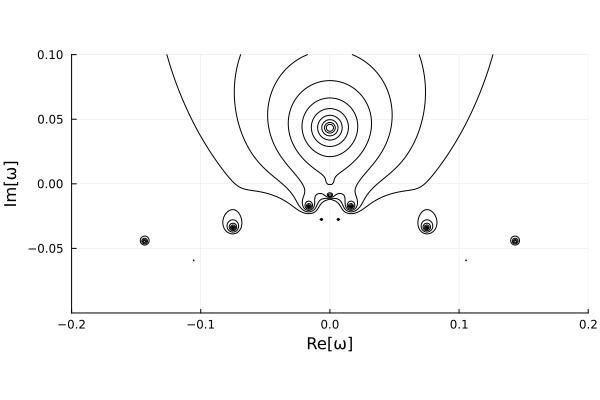

In [12]:

# make a plot
tabOmega = collect(range(Omegamin,Omegamax,length=nOmega))
tabEta = collect(range(Etamin,Etamax,length=nEta))
    
epsilon = abs.(reshape(tabdet,nEta,nOmega))

# Plot
contour(tabOmega,tabEta,log10.(epsilon), levels=10, color=:black, #levels=[-2.0, -1.5, -1.0, -0.5, -0.25, 0.0], 
        xlabel="Re[ω]", ylabel="Im[ω]", xlims=(Omegamin,Omegamax), ylims=(Etamin,Etamax),
        clims=(-2, 0), aspect_ratio=:equal, legend=false)
#savefig("ROIdeterminant.png")

